# Tensorflow Classification On PIMA

-> tf.estimator

-> categorical and continuous features

-> Linear and DNN Classsifier

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
cols_to_norm = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']

In [7]:
# Normalizing the data.
df[cols_to_norm] = df [cols_to_norm].apply(lambda x: (x-x.min())/(x.max() - x.min()))

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [9]:
num_preg = tf.feature_column.numeric_column('Pregnancies')
plasma_gluc = tf.feature_column.numeric_column('Glucose')
dias_press = tf.feature_column.numeric_column('BloodPressure')
tricep = tf.feature_column.numeric_column('SkinThickness')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
age = tf.feature_column.numeric_column('Age')                      

In [10]:
assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Outcome',
                                                        hash_bucket_size=10)

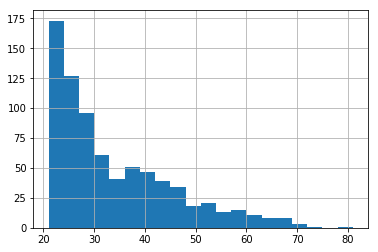

In [11]:
df['Age'].hist(bins = 20)

In [12]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [13]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree,
                age_bucket]

In [14]:
# Train Test Split

x_data = df.drop('Outcome', axis = 1)

In [15]:
x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33


In [16]:
labels = df['Outcome']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels,
                                                test_size = 0.3, random_state = 101)

In [19]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y = y_train,
                                               batch_size = 10, num_epochs = 1000,
                                               shuffle = True)

In [20]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/nr/mmb1j72j4516g5bn1nc52vkm0000gn/T/tmpzl0yrb71', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x110c8c128>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [21]:
model.train(input_fn=input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/nr/mmb1j72j4516g5bn1nc52vkm0000gn/T/tmpzl0yrb71/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 267.584
INFO:tensorflow:loss = 5.1356993, step = 101 (0.375 sec)
INFO:tensorflow:global_step/sec: 571.932
INFO:tensorflow:loss = 6.818746, step = 201 (0.173 sec)
INFO:tensorflow:global_step/sec: 166.713
INFO:tensorflow:loss = 5.8470917, step = 301 (0.600 sec)
INFO:tensorflow:global_step/sec: 500.601
INFO:tensorflow:loss = 5.1782727, step = 401 (0.202 sec)
INFO:tensorflow:global_step/sec: 460.117
INFO:tensorflow:loss = 5.1850657, step = 501 (0.217 sec)
INFO:tensorflow:global_step/sec: 323.433
INFO:tensorflow:loss = 6.248339, step = 601 (0.308 sec)
INFO:tensorflow:

In [22]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test,
                                               batch_size = 10, num_epochs = 1,
                                               shuffle = False)

In [23]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-04-10:46:30
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/nr/mmb1j72j4516g5bn1nc52vkm0000gn/T/tmpzl0yrb71/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-04-10:46:31
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.73593074, accuracy_baseline = 0.64935064, auc = 0.7993827, auc_precision_recall = 0.6537063, average_loss = 0.5259595, global_step = 1000, label/mean = 0.35064936, loss = 5.0623603, precision = 0.6388889, prediction/mean = 0.36980692, recall = 0.56790125


In [24]:
results

{'accuracy': 0.73593074,
 'accuracy_baseline': 0.64935064,
 'auc': 0.7993827,
 'auc_precision_recall': 0.6537063,
 'average_loss': 0.5259595,
 'label/mean': 0.35064936,
 'loss': 5.0623603,
 'precision': 0.6388889,
 'prediction/mean': 0.36980692,
 'recall': 0.56790125,
 'global_step': 1000}

In [25]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test,
                                                      batch_size = 10,
                                                      num_epochs = 1,
                                                      shuffle = False)

In [26]:
predicitions = model.predict(pred_input_func)

In [27]:
my_pred = list(predicitions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/nr/mmb1j72j4516g5bn1nc52vkm0000gn/T/tmpzl0yrb71/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [28]:
my_pred

[{'logits': array([0.05664158], dtype=float32),
  'logistic': array([0.5141566], dtype=float32),
  'probabilities': array([0.48584336, 0.5141566 ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.55874693], dtype=float32),
  'logistic': array([0.6361626], dtype=float32),
  'probabilities': array([0.36383745, 0.6361626 ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.38961583], dtype=float32),
  'logistic': array([0.4038098], dtype=float32),
  'probabilities': array([0.5961902, 0.4038098], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.82457304], dtype=float32),
  'logistic': array([0.3047938], dtype=float32),
  'probabilities': array([0.69520617, 0.30479378], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.8868674], dtype=float32),
  'logistic': ar

In [29]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,20,10],
                                       feature_columns=feat_cols,
                                       n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/nr/mmb1j72j4516g5bn1nc52vkm0000gn/T/tmpyywklsjh', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x111646668>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [30]:
dnn_model.train(input_fn = input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/nr/mmb1j72j4516g5bn1nc52vkm0000gn/T/tmpyywklsjh/model.ckpt.
INFO:tensorflow:loss = 7.039443, step = 1
INFO:tensorflow:global_step/sec: 299.426
INFO:tensorflow:loss = 6.721738, step = 101 (0.336 sec)
INFO:tensorflow:global_step/sec: 509.751
INFO:tensorflow:loss = 3.8671343, step = 201 (0.195 sec)
INFO:tensorflow:global_step/sec: 482.279
INFO:tensorflow:loss = 5.899184, step = 301 (0.210 sec)
INFO:tensorflow:global_step/sec: 518.111
INFO:tensorflow:loss = 5.200197, step = 401 (0.189 sec)
INFO:tensorflow:global_step/sec: 501.698
INFO:tensorflow:loss = 2.3267174, step = 501 (0.202 sec)
INFO:tensorflow:global_step/sec: 483.659
INFO:tensorflow:loss = 6.594874, step = 601 (0.204 sec)
INFO:tensorflow:gl

In [31]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-04-10:46:36
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/nr/mmb1j72j4516g5bn1nc52vkm0000gn/T/tmpyywklsjh/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-04-10:46:36
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7748918, accuracy_baseline = 0.64935064, auc = 0.8327572, auc_precision_recall = 0.71781516, average_loss = 0.47706613, global_step = 1000, label/mean = 0.35064936, loss = 4.5917616, precision = 0.69863015, prediction/mean = 0.35057008, recall = 0.6296296


{'accuracy': 0.7748918,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8327572,
 'auc_precision_recall': 0.71781516,
 'average_loss': 0.47706613,
 'label/mean': 0.35064936,
 'loss': 4.5917616,
 'precision': 0.69863015,
 'prediction/mean': 0.35057008,
 'recall': 0.6296296,
 'global_step': 1000}

In [32]:
list(dnn_model.predict(pred_input_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/nr/mmb1j72j4516g5bn1nc52vkm0000gn/T/tmpyywklsjh/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([0.44653526], dtype=float32),
  'logistic': array([0.6098151], dtype=float32),
  'probabilities': array([0.39018485, 0.6098151 ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([1.0746473], dtype=float32),
  'logistic': array([0.7454797], dtype=float32),
  'probabilities': array([0.2545203, 0.7454797], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-1.466458], dtype=float32),
  'logistic': array([0.18748158], dtype=float32),
  'probabilities': array([0.81251836, 0.18748157], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.5546372], dtype=float32),
  'logistic': array([0.36478922], dtype=float32),
  'probabilities': array([0.6352108 , 0.36478922], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-3.073879], dtype=float32),
  'logistic': array